In [31]:
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input, Convolution1D, Convolution2D
from keras.regularizers import l2, activity_l2

from random import randint
from keras.layers import Merge, LSTM, Dense
# Features: ['Adj_Close', 'Close', 'Date', 'High', 'Low', 'Open', 'Symbol', 'Volume']
testData = np.genfromtxt('testData.txt', dtype = None)


In [32]:
# Part 1  
# One single featuere
X0 = [] # Adj_Close
X1 = [] #
X2 = [] #
X3 = [] #
X4 = [] # High
X5 = [] #

for tuple in testData:
    X4.append(tuple[4])

size = 1000
window = 25
X = np.empty([0, window])
Y = np.zeros(size)
batchSize = 10

for i in range(size):
    start = randint(0, len(testData)-window-1)
    X = np.concatenate((X, np.asarray(X4[start : start + window]).reshape(1, window)), axis = 0)
#    Y[i] = X4[start + window]
#Start of change Y to up/down
    if (X4[start+window]-X4[start+window-1] ) > 0:
        Y[i] = 1 #X4[start + window]
    elif (X4[start+window]-X4[start+window-1]) < 0:
        Y[i] = -1
    else:
        Y[i] = 0
#End of change Y to up/down
print(X.shape)
print(Y.shape)
    
model = Sequential()
model.add(Dense(1, input_dim = window))
model.compile(optimizer='rmsprop',loss='mse') # for a mean squared error regression problem
history = model.fit(X, Y, validation_split=0.33, batch_size=batchSize, nb_epoch=20, initial_epoch=0)
print(history)

(1000, 25)
(1000,)
Train on 669 samples, validate on 331 samples
Epoch 1/20
669/669 [==============================] - 0s - loss: 575.4902 - val_loss: 4.3345
Epoch 2/20
669/669 [==============================] - 0s - loss: 3.9023 - val_loss: 3.1860
Epoch 3/20
669/669 [==============================] - 0s - loss: 4.0314 - val_loss: 3.0968
Epoch 4/20
669/669 [==============================] - 0s - loss: 3.8103 - val_loss: 3.3577

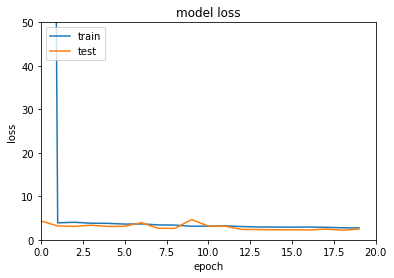

In [33]:
plt.axis((0, 20, 0, 50))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
training_loss = model.evaluate(X, Y, batch_size=batchSize, verbose=1)
print("\nMSE: {}".format(training_loss))

 380/1000 [==========>...................] - ETA: 0s
MSE: 2.60404364109


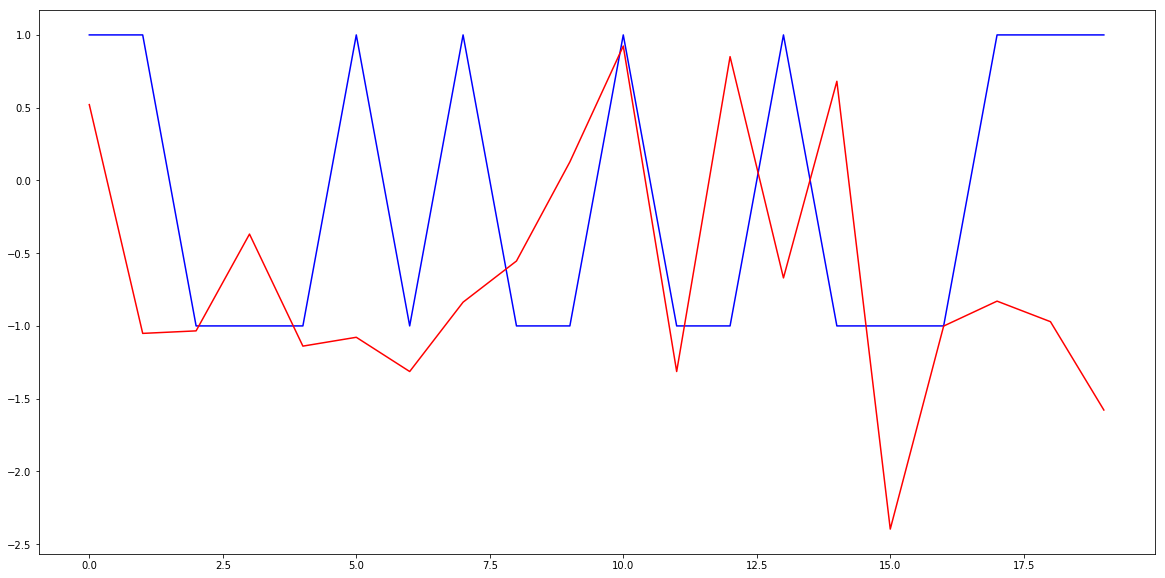

 980/1000 [============================>.] - ETA: 0s

In [35]:
scope = 20  # should be smaller than len(Y)
YHat = model.predict(X, batch_size=batchSize, verbose=0)
YHat = np.ravel(YHat)
x = np.arange(0, scope)
plt.figure(figsize=(20,10))
plt.plot(x, Y[0:scope], 'b', x, YHat[0:scope], 'r')
plt.show()
training_loss = model.evaluate(X, Y, batch_size=batchSize, verbose=1)

In [36]:
#Start of predict success ratio
yes=0
#print YHat
print YHat.shape
for i in range(len(YHat)):
    if YHat[i]*Y[i]>0:
        yes=yes+1
PSR=float(yes)/len(YHat)
print "Predict Success Rate is "+str(PSR*100)+"%"
#End of predict success ratio

(1000,)
Predict Success Rate is 53.5%


In [37]:
# Part 2

import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input, Convolution1D, Convolution2D
from keras.regularizers import l2, activity_l2

from random import randint
from keras.layers import Merge, LSTM, Dense
# Features: ['Adj_Close', 'Close', 'Date', 'High', 'Low', 'Open', 'Symbol', 'Volume']
testData = np.genfromtxt('testData.txt', dtype = None)

# make feature 2 - dates to be number comvertable
for tuple in testData:
    tuple[2] = tuple[2].replace("-", "")
    
# convert feature 6 - stock name to be stock-id (Yahoo == 1)
for tuple in testData:
    tuple[6] = 1

# 7 features so far
data = [[], [], [], [], [], [], []]  
for tuple in testData:
    for i in range(len(data)):
            data[i].append(float(tuple[i]))
# Weights adjustment
w = [0.01, 0.01, 10e-9, 1, 0.01, 0.01, 0, 10e-6]
for i in range(len(data)):
    for j in range(len(data[i])):
        data[i][j] = data[i][j] * w[i]

# Remove redunt features
# Features: ['Adj_Close', 'Close', 'Date', 'High', 'Low', 'Open', 'Symbol', 'Volume']
f = [0, 1, 2, 3, 4, 5]
temp = []
for i in f:
    temp.append(data[i])
data = temp
            
# convert data into numpy 2d array
data = np.asarray(data)   

# print(data[2])

# print(X)


In [38]:
size = 1000
window = 40

# Three dim
# dim1: each datum
# dim2: TimeStep: a sequence of consecutive values 
# dim3: Feature Dimention: There are 7 features
X = np.empty([0, window, len(data)])  
Y = np.zeros(size)
batchSize = 20

print(data.shape)
print(X.shape)
print(data[:, 0:0 + window].shape)
for i in range(size):
    start = randint(0, len(testData)-window-1)
    oneSlice = data[:, start:start + window].T
    # to concatenate, we need to reshape one slice to 3d
    X = np.concatenate((X, np.asarray(oneSlice).reshape(1, window, len(data))), axis = 0) 
#    Y[i] = data[3][start + window]    # Need to figure out which is high 
#Start of change Y to up/down
    if (data[3][start+window]-data[3][start+window-1] ) > 0:
        Y[i] = 1 #X4[start + window]
    elif (data[3][start+window]-data[3][start+window-1]) < 0:
        Y[i] = -1
    else:
        Y[i] = 0
#End of change Y to up/down
# X = X.reshape(len(X), len(data)*window)
# print(X)
# print(Y)

(6, 756)
(0, 40, 6)
(6, 40)


In [39]:
# mse = 6.9
# model.add(Convolution1D(len(data), window*0.5, border_mode='same', input_shape=(window, len(data))))
# model.add(LSTM(int(p*0.8), input_shape=(window, len(data))))
# model.add(Dense(p*0.6))
# model.add(Dense(p*0.3))
# model.add(Dense(p*0.1))
# model.add(Dense(3))
# model.add(Dense(1))

# mse = 2.8
# p = window*len(data)
# model.add(Convolution1D(len(data), window*0.1, border_mode='same', input_shape=(window, len(data))))
# model.add(LSTM(int(p*0.3), input_shape=(window, len(data))))
# model.add(Dense(p*0.1))
# model.add(Dense(p*0.08))
# model.add(Dense(3))
# model.add(Dense(1))

# mse = 1.6 - Test, 0.9 - Validation
model = Sequential()
model.add(LSTM(120, input_shape=(window, len(data))))
model.add(Dense(100))
model.add(Dense(1))
model.compile(optimizer='rmsprop',loss='mse') # a mean squared error regression problem
history = model.fit(X, Y, validation_split=0.4, batch_size=batchSize, nb_epoch=20, initial_epoch=0)

Train on 600 samples, validate on 400 samples
Epoch 1/20
600/600 [==============================] - 7s - loss: 1.0768 - val_loss: 1.0297

In [40]:
model = Sequential()
# model.add(Convolution1D(len(data), window*0.1, border_mode='same', input_shape=(window, len(data))))
# model.add(LSTM(int(size*0.5), input_shape=(window, len(data))))
# model.add(Dense(p*0.8, activation = "linear"))
# model.add(Dense(p*0.5, activation = "linear"))
# model.add(Dense(1, input_shape=(window, len(data))))
model.add(LSTM(120, input_shape=(window, len(data))))
model.add(Dense(100))
model.add(Dense(1))
model.compile(optimizer='rmsprop',loss='mse') # a mean squared error regression problem
history = model.fit(X, Y, validation_split=0.4, batch_size=batchSize, nb_epoch=20, initial_epoch=0)
print(history)

Train on 600 samples, validate on 400 samples
Epoch 1/20
600/600 [==============================] - 7s - loss: 1.1143 - val_loss: 1.4698

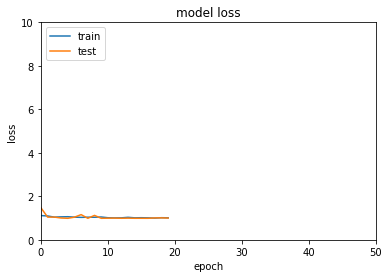

In [41]:
plt.axis((0, 50, 0, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
training_loss = model.evaluate(X, Y, batch_size=batchSize, verbose=1)
print("\nMSE: {}".format(training_loss))

 980/1000 [============================>.] - ETA: 0s

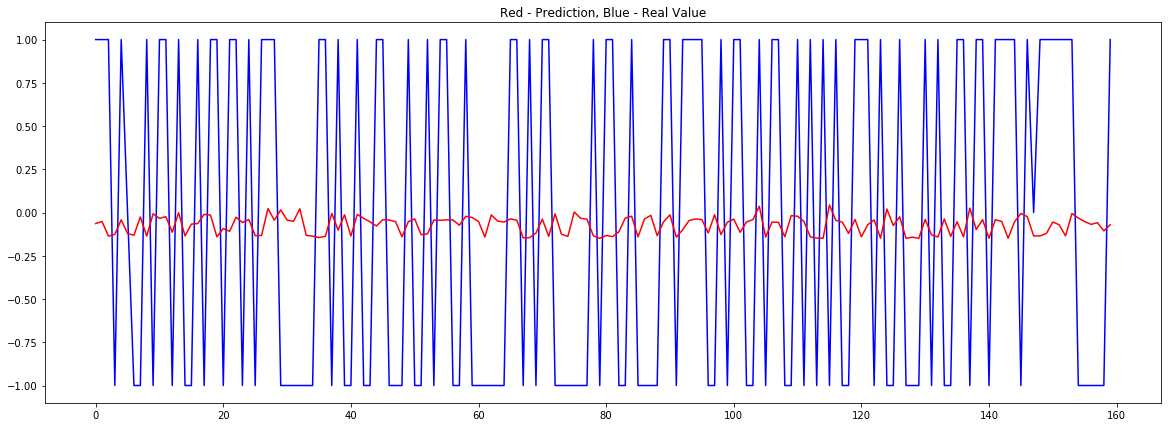

In [43]:
scope = 160  # should be smaller than len(Y)
YHat = model.predict(X, batch_size=batchSize, verbose=0)
YHat = np.ravel(YHat)
x = np.arange(0, scope)
plt.figure(figsize=(20,7))
plt.plot(x, Y[0:scope], 'b', x, YHat[0:scope], 'r')
plt.title("Red - Prediction, Blue - Real Value")
plt.show()
# training_loss = model.evaluate(X, Y, batch_size=batchSize, verbose=1)


In [44]:
#Start of predict success ratio
yes=0
#print YHat
print YHat.shape
for i in range(len(YHat)):
    if YHat[i]*Y[i]>0:
        yes=yes+1
PSR=float(yes)/len(YHat)
print "Predict Success Rate is "+str(PSR*100)+"%"
#End of predict success ratio

(1000,)
Predict Success Rate is 48.3%
